In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from bivariate_analysis import BivariateAnalysis

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
df = pd.read_csv('heart.csv')

print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
print("Dataset information:")
df.info()

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
print("Statistical summary of the dataset:")
df.describe()

Statistical summary of the dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
print("Missing values in each column:")
df.isnull().sum()

Missing values in each column:


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data_dictionary = {
    'age': 'Age in years',
    'sex': 'Sex (1 = male, 0 = female)',
    'cp': 'Chest pain type (0: Typical angina, 1: Atypical angina, 2: Non-anginal pain, 3: Asymptomatic)',
    'trestbps': 'Resting blood pressure (in mm Hg)',
    'chol': 'Serum cholesterol in mg/dl',
    'fbs': 'Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)',
    'restecg': 'Resting electrocardiographic results (0: Normal, 1: ST-T wave abnormality, 2: Left ventricular hypertrophy)',
    'thalach': 'Maximum heart rate achieved',
    'exang': 'Exercise induced angina (1 = yes; 0 = no)',
    'oldpeak': 'ST depression induced by exercise relative to rest',
    'slope': 'Slope of the peak exercise ST segment (0: Upsloping, 1: Flat, 2: Downsloping)',
    'ca': 'Number of major vessels (0-3) colored by fluoroscopy',
    'thal': 'Thalassemia (1 = normal; 2 = fixed defect; 3 = reversible defect)',
    'target': 'Presence of heart disease (1 = yes, 0 = no)'
}

for feature, description in data_dictionary.items():
    print(f"{feature}: {description}")

age: Age in years
sex: Sex (1 = male, 0 = female)
cp: Chest pain type (0: Typical angina, 1: Atypical angina, 2: Non-anginal pain, 3: Asymptomatic)
trestbps: Resting blood pressure (in mm Hg)
chol: Serum cholesterol in mg/dl
fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
restecg: Resting electrocardiographic results (0: Normal, 1: ST-T wave abnormality, 2: Left ventricular hypertrophy)
thalach: Maximum heart rate achieved
exang: Exercise induced angina (1 = yes; 0 = no)
oldpeak: ST depression induced by exercise relative to rest
slope: Slope of the peak exercise ST segment (0: Upsloping, 1: Flat, 2: Downsloping)
ca: Number of major vessels (0-3) colored by fluoroscopy
thal: Thalassemia (1 = normal; 2 = fixed defect; 3 = reversible defect)
target: Presence of heart disease (1 = yes, 0 = no)


Target variable distribution:
target
1    526
0    499
Name: count, dtype: int64
Percentage of patients with heart disease: 51.32%


C:\Users\krish\AppData\Local\Temp\ipykernel_14972\1306574308.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='viridis')


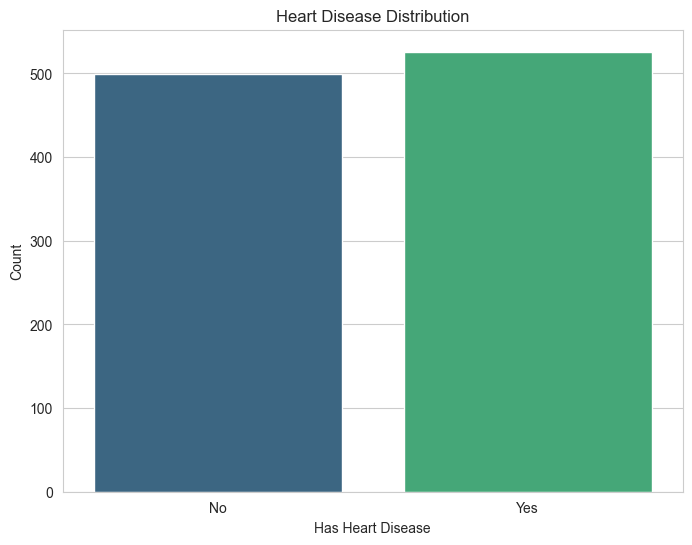

In [8]:
print("Target variable distribution:")
print(df['target'].value_counts())
print(f"Percentage of patients with heart disease: {df['target'].mean() * 100:.2f}%")

plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df, palette='viridis')
plt.title('Heart Disease Distribution')
plt.xlabel('Has Heart Disease')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

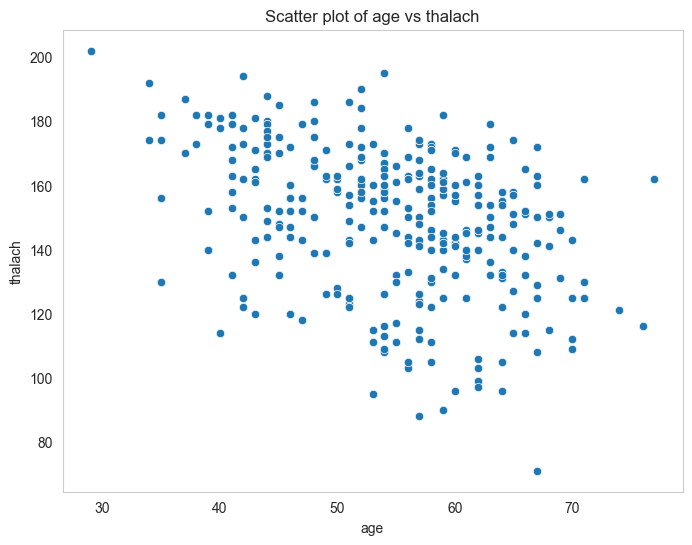

Correlation between age and thalach: -0.39


In [9]:
BivariateAnalysis.analyze_bivariate(df, 'age', 'thalach')

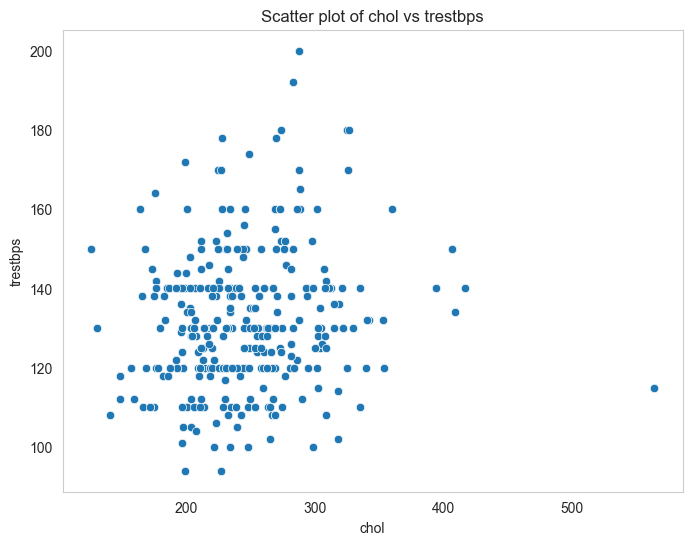

Correlation between chol and trestbps: 0.13


In [10]:
BivariateAnalysis.analyze_bivariate(df, 'chol', 'trestbps')

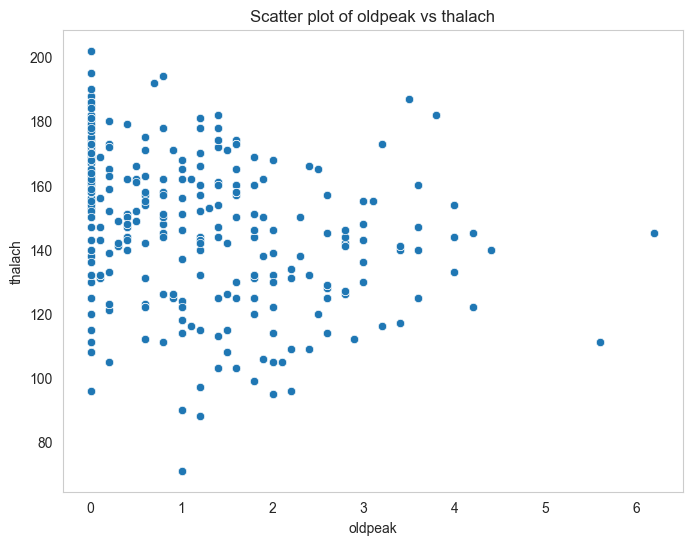

Correlation between oldpeak and thalach: -0.35


In [11]:
BivariateAnalysis.analyze_bivariate(df, 'oldpeak', 'thalach')

C:\Users\krish\AppData\Local\Temp\ipykernel_14972\3873645037.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, palette='viridis')
C:\Users\krish\AppData\Local\Temp\ipykernel_14972\3873645037.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, palette='viridis')
C:\Users\krish\AppData\Local\Temp\ipykernel_14972\3873645037.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, palette='viridis')
C:\Users\krish\AppData\Local\Temp\ipykernel_14972\38736

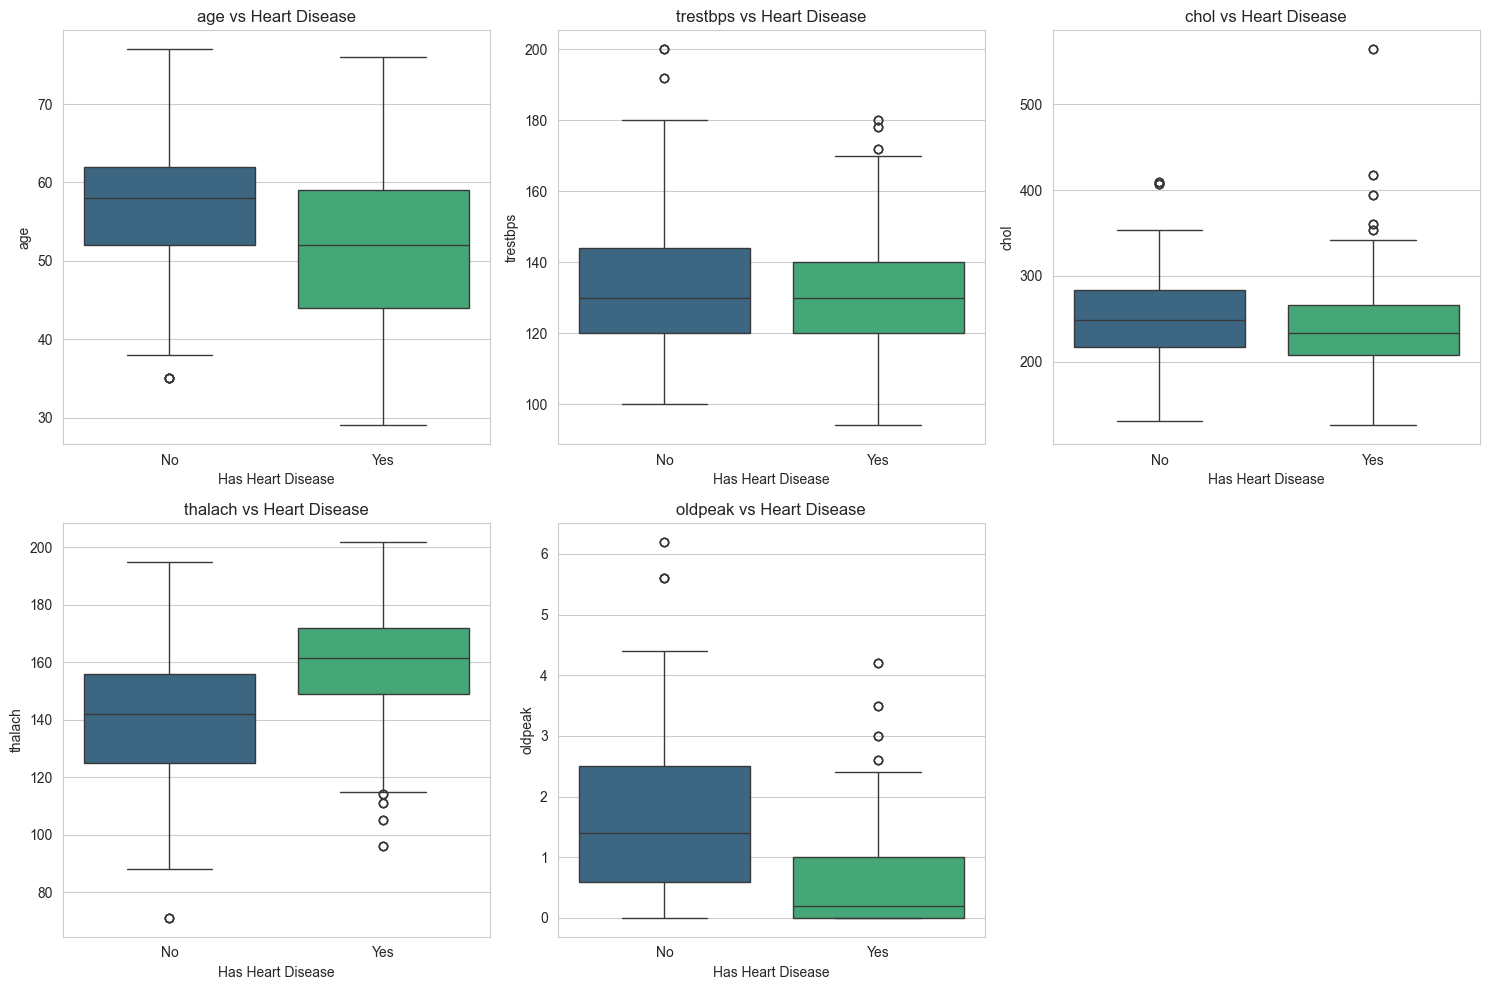

In [12]:
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='target', y=feature, data=df, palette='viridis')
    plt.title(f'{feature} vs Heart Disease')
    plt.xlabel('Has Heart Disease')
    plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()

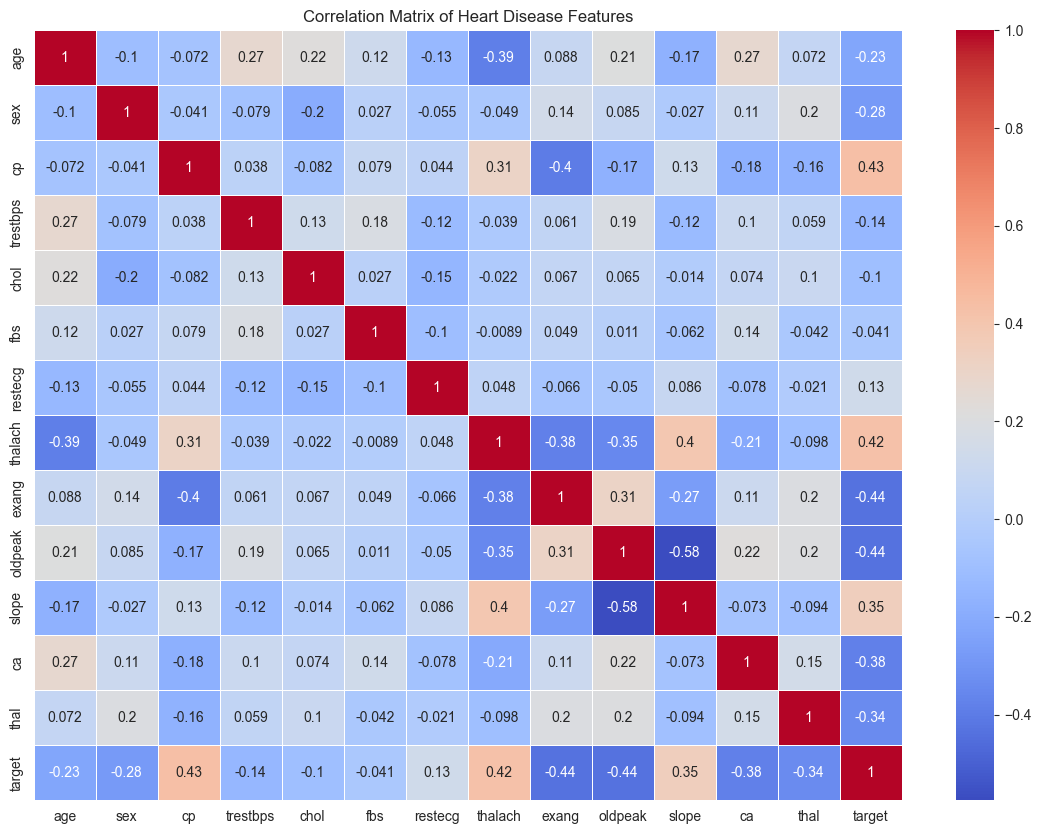

In [13]:
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Heart Disease Features')
plt.show()

In [14]:
correlation_with_target = correlation_matrix['target'].sort_values(ascending=False)
print("Correlation of features with target variable:")
print(correlation_with_target)

Correlation of features with target variable:
target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64


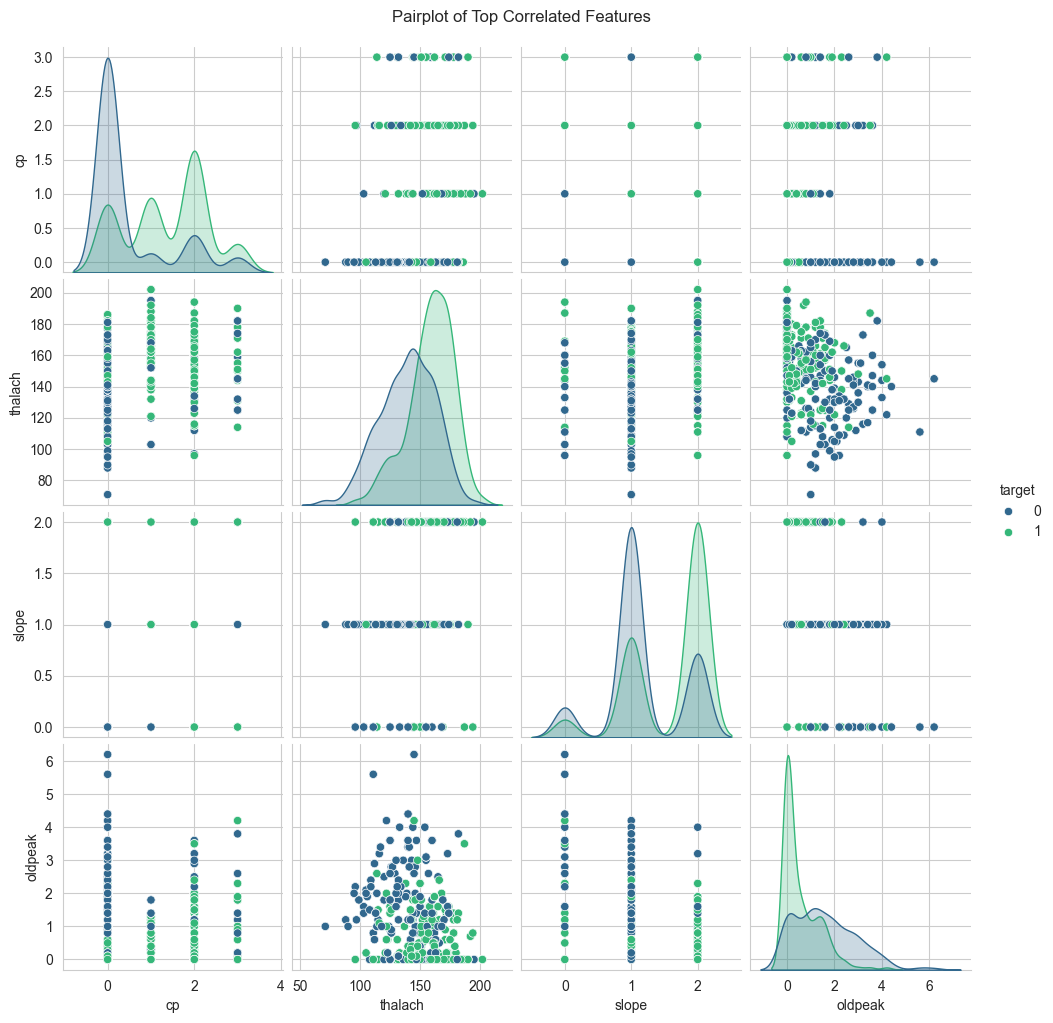

In [15]:
top_features = ['cp', 'thalach', 'slope', 'oldpeak', 'target']
sns.pairplot(df[top_features], hue='target', palette='viridis')
plt.suptitle('Pairplot of Top Correlated Features', y=1.02)
plt.show()

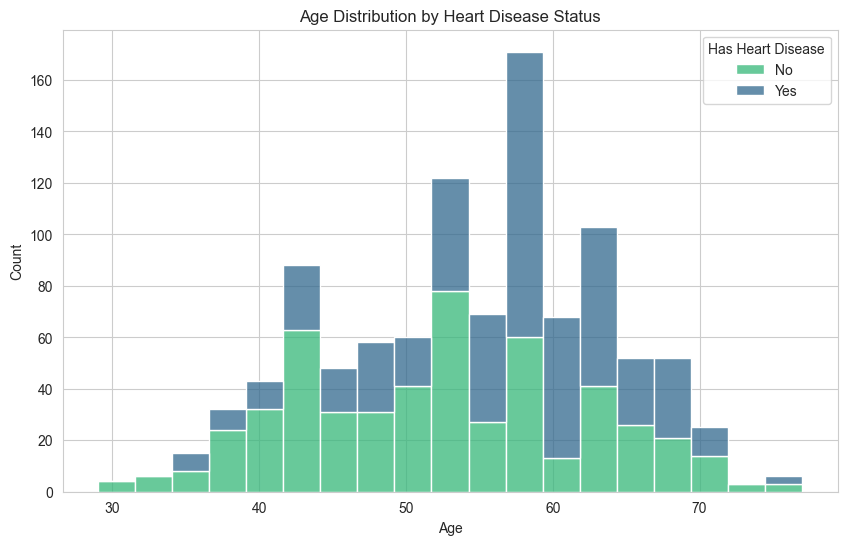

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='target', multiple='stack', palette='viridis')
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Has Heart Disease', labels=['No', 'Yes'])
plt.show()

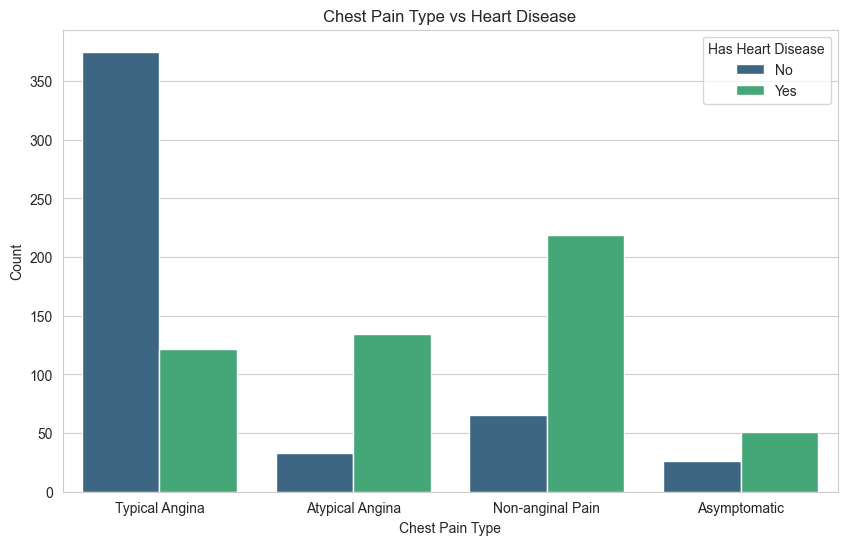

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cp', hue='target', data=df, palette='viridis')
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Has Heart Disease', labels=['No', 'Yes'])
plt.xticks([0, 1, 2, 3], ['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])
plt.show()

In [18]:
def print_findings():
    print("Key Findings from the Heart Disease Analysis:")
    print("-" * 50)
    
    print(f"1. {df['target'].mean() * 100:.2f}% of patients in the dataset have heart disease.")
    
    avg_age_healthy = df[df['target'] == 0]['age'].mean()
    avg_age_diseased = df[df['target'] == 1]['age'].mean()
    print(f"2. Average age of patients without heart disease: {avg_age_healthy:.2f} years")
    print(f"   Average age of patients with heart disease: {avg_age_diseased:.2f} years")
    
    top_pos_corr = correlation_with_target.iloc[1:4]  
    top_neg_corr = correlation_with_target.iloc[-3:]
    print("3. Features most positively correlated with heart disease:")
    for feature, corr in top_pos_corr.items():
        print(f"   - {feature}: {corr:.3f}")
    
    print("4. Features most negatively correlated with heart disease:")
    for feature, corr in top_neg_corr.items():
        print(f"   - {feature}: {corr:.3f}")
    
    asymptomatic_cp = df[df['cp'] == 3]['target'].mean() * 100
    print(f"5. {asymptomatic_cp:.2f}% of patients with asymptomatic chest pain (cp=3) have heart disease.")
    
    avg_thalach_healthy = df[df['target'] == 0]['thalach'].mean()
    avg_thalach_diseased = df[df['target'] == 1]['thalach'].mean()
    print(f"6. Patients with heart disease have an average maximum heart rate of {avg_thalach_diseased:.2f} bpm")
    print(f"   compared to {avg_thalach_healthy:.2f} bpm for those without heart disease.")

print_findings()

Key Findings from the Heart Disease Analysis:
--------------------------------------------------
1. 51.32% of patients in the dataset have heart disease.
2. Average age of patients without heart disease: 56.57 years
   Average age of patients with heart disease: 52.41 years
3. Features most positively correlated with heart disease:
   - cp: 0.435
   - thalach: 0.423
   - slope: 0.346
4. Features most negatively correlated with heart disease:
   - ca: -0.382
   - exang: -0.438
   - oldpeak: -0.438
5. 66.23% of patients with asymptomatic chest pain (cp=3) have heart disease.
6. Patients with heart disease have an average maximum heart rate of 158.59 bpm
   compared to 139.13 bpm for those without heart disease.


In [19]:
print("""
Conclusion:
The analysis reveals several key factors associated with heart disease, including chest pain type, 
maximum heart rate, ST segment slope, and ST depression. We also observed significant differences 
in various metrics between patients with and without heart disease.

Next Steps:
1. Perform feature importance analysis using machine learning techniques
2. Build predictive models to forecast heart disease risk
3. Further investigate the relationship between chest pain types and heart disease
4. Analyze the interaction effects between features like age, sex, and cholesterol
5. Create a risk scoring system based on the most significant factors
""")


Conclusion:
The analysis reveals several key factors associated with heart disease, including chest pain type, 
maximum heart rate, ST segment slope, and ST depression. We also observed significant differences 
in various metrics between patients with and without heart disease.

Next Steps:
1. Perform feature importance analysis using machine learning techniques
2. Build predictive models to forecast heart disease risk
3. Further investigate the relationship between chest pain types and heart disease
4. Analyze the interaction effects between features like age, sex, and cholesterol
5. Create a risk scoring system based on the most significant factors

